# Coastal Erosion Hazard
This notebook calculates the urban risk index for Coastal Erosion (CER)
hazard.  The URI calculation has three components: expected loss, social vulnerability, and resilience capacity.  

## 1. Expected Loss
The CER hazard expected loss (ESL) includes consequences for the following receptors and marginal losses.
 * Shoreline / Loss of Ecosystem Services

#### 1a. Shoreline / Loss of Ecosystem Services
A coastal retreat of 0.3 m (1.0 ft) per year along the shoreline in CEHA regions was used to calculate the number of acres of marine ecosystem lost each year to coastal erosion in each census tract. The ecosystem loss was assigned a value of $1,799/acre/year based on FEMA guidelines. The total cumulative loss was projected and annualized assuming a 100 year time-horizon with a negligible real discount rate.

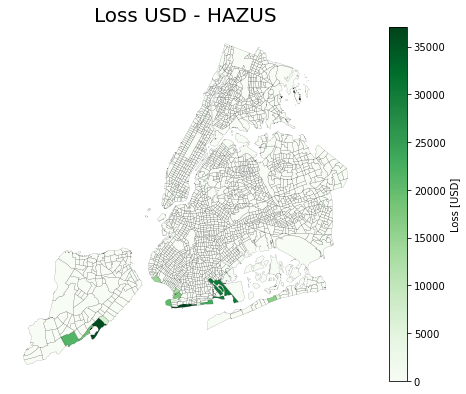

In [3]:
from MISC import params_1 as params
from MISC import utils_1 as utils
from MISC import plotting_1 as plotting
from CLASSES import class_EL_SV_CR_1 as URI
import matplotlib.pyplot as plt
import geopandas as gpd
import os
utils.set_home()
hazard_name = "CER"

#create ESL class and add loss
path_loss =   params.PATHNAMES.at['ESL_CER_ecosystem_loss', 'Value']
gdf_ESL_deaths = gpd.read_file(path_loss)
ESL = URI.ESL(hazard_name = hazard_name)
ESL.add_consequence("Ecosystem_Loss", "Shoreline", gdf_ESL_deaths)

#plot
plotting.plot_ESL_nb(hazard_name, ESL.consequence["Ecosystem_Loss"]["map_tract"], 'Loss USD - HAZUS')

#### 1b. Expected Loss Total
The total expected losses are the sum of losses from each individual consequence.  

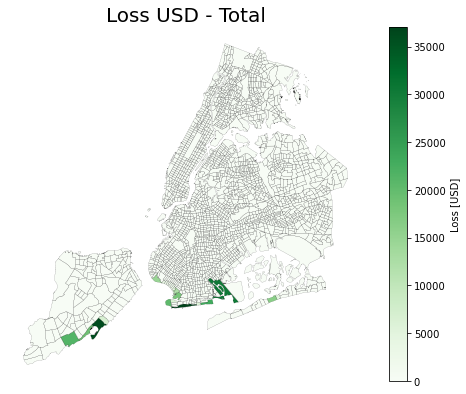

In [4]:
#save result
path_save = params.PATHNAMES.at['OUTPUTS_folder', 'Value'] + r'\ESL\ESL_{}_tract.shp'.format(hazard_name, hazard_name)
ESL.ESL_map.to_file(path_save)

#plot
plotting.plot_ESL_nb(hazard_name, ESL.ESL_map, 'Loss USD - Total')

## 2. Social Vulnerability Score
The Social Vulnerability is based on the CDC social vulnerability index.  

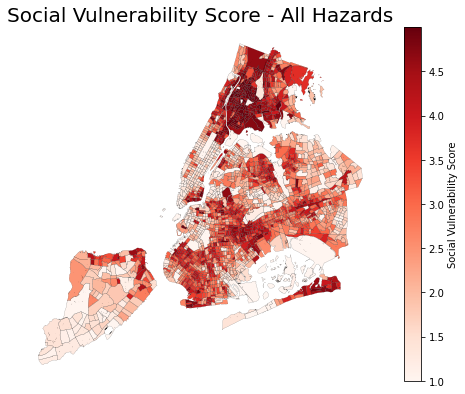

In [5]:
path_SOV = params.PATHNAMES.at['OUTPUTS_folder', 'Value'] + r'\\SOV\SOV_tract.shp'
gdf_SOV = gpd.read_file(path_SOV)
SOV = URI.SOV(hazard_name = hazard_name, map_tract = gdf_SOV)

#plot
plotting.plot_SOV_nb(SOV.SOV_map)

## 3. Resilience Capacity Score
The Resilience Capacity is the sum of four scores:
- Community Capital
- Mitigation Landscape
- Response Capacity
- Recovery Resources


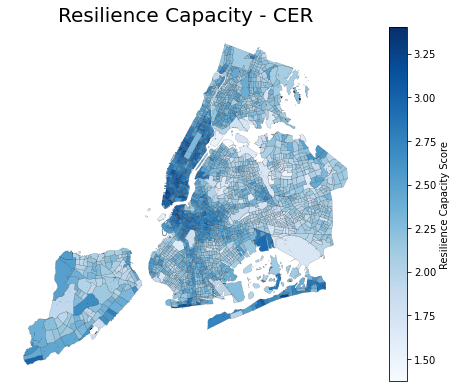

In [6]:
path_RCA = params.PATHNAMES.at['OUTPUTS_folder', 'Value'] + r'\\RCA\RCA_{}_tract.shp'.format(hazard_name)
gdf_RCA = gpd.read_file(path_RCA)
RCA = URI.RCA(hazard_name=hazard_name, map_tract=gdf_RCA)
plotting.plot_RCA_nb('CER', RCA.RCA_map)

## 4. Calculate URI Score
The URI equation is URI = ESL * SOV / RCA.  The result is clustered into a score of 1 (low) to 5 (high).

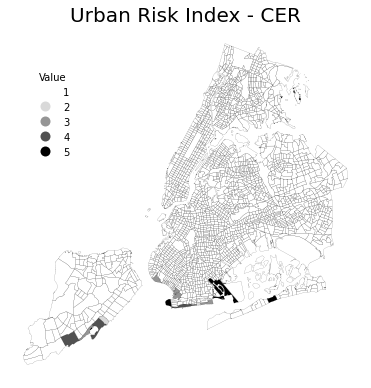

In [7]:
URI_HAZ = URI.URI(hazard_name=hazard_name, ESL=ESL, SOV=SOV, RCA=RCA)
URI_HAZ.calc_URI()
#save result
path_save = params.PATHNAMES.at['OUTPUTS_folder', 'Value'] + r'\URI\URI_{}_tract.shp'.format(hazard_name, hazard_name)
URI_HAZ.URI_map.to_file(path_save)
URI_HAZ.save_URI_FULL()
#plot
plotting.plot_URI_nb(hazard_name, URI_HAZ.URI_map)